In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from linregress import linearly_regress
from linregress import model_averages

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

len(df['zipcode'].unique())

70

In [3]:
zip_dummies_df = pd.get_dummies(df['zipcode'], drop_first= True)

In [4]:
df.dropna(inplace=True)

In [5]:
df.replace({'NO': 0, 'YES': 1}, inplace = True)

In [6]:
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [7]:
df.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace= True)

In [8]:
df['yr_renovated'].mask(df['yr_renovated'] == 0, df['yr_built'], inplace = True)


In [9]:
df.drop(columns = ['yr_built', 'bedrooms', 'bathrooms', 'sqft_above'], inplace = True)

In [10]:
df.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [11]:
numeric_df = df.drop(columns = ['id', 'date', 'sqft_lot15', 'sqft_living15', 'sqft_lot'])

In [12]:
numeric_df.replace({'7 Average': 7, '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6, '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3, '13 Mansion': 13}, inplace = True)

In [13]:
numeric_df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [14]:
numeric_df.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace = True)

In [15]:
numeric_df.drop(columns = 'sqft_basement', inplace = True)

In [16]:
numeric_df.drop(columns = 'zipcode', inplace = True)
numeric_df = numeric_df.join(zip_dummies_df)

In [17]:
numeric_df.corr()

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,lat,long,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
price,1.000000,0.706189,0.259505,0.274212,0.396862,0.034367,0.664146,0.100023,0.306607,0.021215,...,-0.058439,-0.035521,-0.048369,-0.019723,-0.088245,0.043067,-0.066129,-0.053088,-0.074284,0.081649
sqft_living,0.706189,1.000000,0.359407,0.111491,0.285506,-0.062319,0.764251,0.338318,0.058394,0.239521,...,-0.056582,-0.023432,-0.049315,0.001231,-0.070646,0.029806,-0.043424,-0.021220,-0.046286,0.012126
floors,0.259505,0.359407,1.000000,0.018382,0.027518,-0.261013,0.459843,0.499460,0.058190,0.129769,...,-0.060949,-0.024635,-0.071771,-0.049262,-0.071733,-0.040299,-0.066555,-0.038400,-0.062976,-0.002429
waterfront,0.274212,0.111491,0.018382,1.000000,0.409773,0.016454,0.083034,-0.001108,-0.015935,-0.042324,...,0.027567,-0.004527,0.003273,0.065003,-0.009752,-0.002856,0.043998,-0.006892,0.035175,-0.010445
view,0.396862,0.285506,0.027518,0.409773,1.000000,0.046354,0.248679,-0.023260,0.008403,-0.078500,...,0.027208,-0.015615,-0.018400,0.067669,-0.032119,0.096974,0.044816,-0.007788,0.051673,0.039814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,0.043067,0.029806,-0.040299,-0.002856,0.096974,0.012735,0.031432,-0.032053,0.144793,-0.121728,...,-0.012855,-0.005664,-0.015571,-0.011941,-0.012200,1.000000,-0.012071,-0.008622,-0.012547,-0.013067
98178,-0.066129,-0.043424,-0.066555,0.043998,0.044816,-0.015783,-0.082270,-0.063470,-0.047504,-0.026889,...,-0.012925,-0.005694,-0.015655,-0.012006,-0.012266,-0.012071,1.000000,-0.008669,-0.012615,-0.013137
98188,-0.053088,-0.021220,-0.038400,-0.006892,-0.007788,-0.014750,-0.041789,-0.018008,-0.063138,-0.037451,...,-0.009232,-0.004067,-0.011182,-0.008576,-0.008761,-0.008622,-0.008669,1.000000,-0.009011,-0.009384
98198,-0.074284,-0.046286,-0.062976,0.035175,0.051673,0.011352,-0.058135,-0.022689,-0.138457,-0.083016,...,-0.013434,-0.005919,-0.016272,-0.012479,-0.012749,-0.012547,-0.012615,-0.009011,1.000000,-0.013655


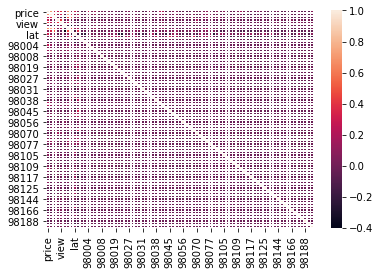

In [18]:
import seaborn as sns
sns.heatmap(numeric_df.corr(), linewidth = 0.5);

In [19]:
# from sklearn import preprocessing

# standardized_data = preprocessing.scale(numeric_df)

# df_standard = pd.DataFrame(standardized_data, columns = numeric_df.columns)

In [20]:
# import statsmodels.api as sm

# y= df_standard['price']
# X = sm.add_constant(df_standard.drop(columns = ['price', 'floors']))

# model = sm.OLS(y, X).fit()

# model.summary()

In [21]:
# def linearly_regress(y, X):
#     lr = LinearRegression()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     lr.fit(X_train, y_train)
#     r_squared = lr.score(X_train, y_train)

#     y_pred = lr.predict(X_test)
#     MAE = mean_absolute_error(y_pred, y_test)
#     RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
    
#     return (lr, r_squared, MAE, RMSE)



In [22]:
X = numeric_df.drop(columns = ['price', 'floors', 'condition'])
y = numeric_df['price']

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.798868777092879, 101751.08269648164, 172508.26163189704)


Our model is trash!

In [23]:
outlier_dropped_df = numeric_df[numeric_df['price'] < numeric_df['price'].quantile(0.95)]


In [24]:
outlier_dropped_df.shape

(14970, 79)

In [25]:
y= outlier_dropped_df['price']
X = outlier_dropped_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.8184804775474921, 67144.72207453543, 92358.98892439151)


In [26]:
log_scaled_df = numeric_df.copy()

log_scaled_df['price'] = np.log(numeric_df['price'])
log_scaled_df['sqft_living'] = np.log(numeric_df['sqft_living'])

log_scaled_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,lat,long,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1,13.195614,7.851661,2.0,0,0,2,7,1991.0,47.7210,-122.319,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,1.0,0,0,4,7,1965.0,47.5208,-122.393,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,1.0,0,0,2,8,1987.0,47.6168,-122.045,...,0,0,0,0,0,0,0,0,0,0
5,14.022525,8.597851,1.0,0,0,2,11,2001.0,47.6561,-122.005,...,0,0,0,0,0,0,0,0,0,0
6,12.458775,7.447168,2.0,0,0,2,7,1995.0,47.3097,-122.327,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,13.071070,7.177782,2.0,0,0,2,8,2008.0,47.5773,-122.409,...,0,0,0,0,0,0,0,0,0,0
21592,12.793859,7.333023,3.0,0,0,2,8,2009.0,47.6993,-122.346,...,0,0,0,0,0,0,0,0,0,0
21593,12.899220,7.745003,2.0,0,0,2,8,2014.0,47.5107,-122.362,...,1,0,0,0,0,0,0,0,0,0
21594,12.904459,6.927558,2.0,0,0,2,7,2009.0,47.5944,-122.299,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y= log_scaled_df['price']
X = log_scaled_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.8683416946070757, 0.1424599638508807, 0.1927314513919439)


In [28]:
good_df = log_scaled_df[log_scaled_df['condition'] >= 2]
bad_df = log_scaled_df[log_scaled_df['condition'] < 2]


In [29]:
y_good = good_df['price']
X_good = good_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y_good, X_good)

In [30]:
results

(LinearRegression(),
 0.8713732716687591,
 0.14034399497642375,
 0.19104107152104383)

In [31]:
y_bad = bad_df['price']
X_bad = bad_df.drop(columns = ['price', 'floors', 'condition'])

y_pred = results[0].predict(X_bad)

In [32]:
y_difs = y_pred - y_bad

In [33]:
y_difs.sort_values(ascending = False)

16879    1.237713
880      0.890845
10573    0.830998
11784    0.809799
5522     0.797819
           ...   
14354   -0.606705
4081    -0.627349
19433   -0.661883
10416   -0.731377
8614    -1.037649
Name: price, Length: 150, dtype: float64

Lets create 100 models and get the averages over them for a more accurate result

In [34]:
results = model_averages(y_good, X_good, y_bad, X_bad, 100)

results_df = results[0]
print(results[1])

0.13979765471026517


In [35]:
results_df['price'] = np.exp(results_df['price'])
results_df['averages'] = np.exp(results_df['averages'])

In [36]:
results_difs = results_df['averages'] - results_df['price']

In [37]:
final_df = numeric_df[numeric_df['condition'] < 2].copy()

In [38]:
final_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,lat,long,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
36,550000.0,1660,1.0,0,0,0,5,1933.0,47.6621,-122.132,...,0,0,0,0,0,0,0,0,0,0
38,240000.0,1220,1.0,0,0,1,7,1969.0,47.3341,-122.282,...,0,0,0,0,0,0,0,0,0,0
242,455000.0,1430,1.5,0,0,1,7,1925.0,47.6727,-122.299,...,0,0,0,0,0,0,0,0,0,0
328,186375.0,1000,1.0,0,0,1,7,1952.0,47.4720,-122.344,...,0,0,0,1,0,0,0,0,0,0
380,270000.0,1380,1.0,0,0,0,6,1954.0,47.7461,-122.195,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,200000.0,960,1.0,0,0,1,6,1933.0,47.5621,-121.862,...,0,0,0,0,0,0,0,0,0,0
19284,174900.0,1100,1.5,0,0,1,6,1926.0,47.5279,-122.318,...,0,0,0,0,0,0,0,0,0,0
19348,290000.0,2340,2.0,0,0,1,8,1978.0,47.3468,-122.091,...,0,0,0,0,0,0,0,0,0,0
19433,450000.0,1350,1.0,0,0,1,6,1946.0,47.4657,-122.198,...,0,0,0,0,0,0,0,0,0,0


In [39]:
results_difs

36      -164842.306635
38       -26184.188008
242       66760.580319
328       84143.329741
380       46260.995712
             ...      
19219     92512.938064
19284     83539.992972
19348     64551.589061
19433   -214004.120376
19496    -28947.417390
Length: 150, dtype: float64

In [40]:
final_df['pred_price'] = results_difs
final_df['estimated_cost'] = final_df['sqft_living'] * 70


In [41]:
final_df['estimated_profit'] = final_df['pred_price'] - final_df['estimated_cost']

In [42]:
final_df.sort_values('estimated_profit', ascending = False)

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,lat,long,...,98166,98168,98177,98178,98188,98198,98199,pred_price,estimated_cost,estimated_profit
17524,425000.0,1730,1.0,0,0,1,7,1955.0,47.5979,-122.194,...,0,0,0,0,0,0,0,368966.940702,121100,247866.940702
16879,125000.0,1230,1.5,0,0,0,6,1916.0,47.6941,-122.365,...,0,0,0,0,0,0,0,301973.358595,86100,215873.358595
880,200000.0,1920,1.0,0,0,1,6,1914.0,47.5507,-122.381,...,0,0,0,0,0,0,0,277477.334127,134400,143077.334127
4655,302000.0,1600,2.0,0,0,1,7,1906.0,47.6028,-122.312,...,0,0,0,0,0,0,0,239086.611452,112000,127086.611452
11784,170000.0,1200,2.0,0,0,1,7,1976.0,47.6337,-121.961,...,0,0,0,0,0,0,0,209270.494266,84000,125270.494266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,555750.0,1060,1.0,0,0,1,6,1913.0,47.5545,-122.288,...,0,0,0,0,0,0,0,-260015.364751,74200,-334215.364751
4486,950000.0,2980,2.0,0,0,1,10,1981.0,47.7154,-122.161,...,0,0,0,0,0,0,0,-162850.068536,208600,-371450.068536
18861,1500000.0,1910,1.0,0,0,0,8,1955.0,47.6453,-122.214,...,0,0,0,0,0,0,0,-526387.451752,133700,-660087.451752
6622,850000.0,5440,1.0,0,0,1,9,1969.0,47.3540,-122.293,...,0,0,0,0,0,0,0,-279329.932689,380800,-660129.932689


In [43]:
profitable_df = final_df.loc[final_df['estimated_profit'] > 0]

In [44]:
final_df.sort_values('estimated_profit', ascending = False)

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,lat,long,...,98166,98168,98177,98178,98188,98198,98199,pred_price,estimated_cost,estimated_profit
17524,425000.0,1730,1.0,0,0,1,7,1955.0,47.5979,-122.194,...,0,0,0,0,0,0,0,368966.940702,121100,247866.940702
16879,125000.0,1230,1.5,0,0,0,6,1916.0,47.6941,-122.365,...,0,0,0,0,0,0,0,301973.358595,86100,215873.358595
880,200000.0,1920,1.0,0,0,1,6,1914.0,47.5507,-122.381,...,0,0,0,0,0,0,0,277477.334127,134400,143077.334127
4655,302000.0,1600,2.0,0,0,1,7,1906.0,47.6028,-122.312,...,0,0,0,0,0,0,0,239086.611452,112000,127086.611452
11784,170000.0,1200,2.0,0,0,1,7,1976.0,47.6337,-121.961,...,0,0,0,0,0,0,0,209270.494266,84000,125270.494266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,555750.0,1060,1.0,0,0,1,6,1913.0,47.5545,-122.288,...,0,0,0,0,0,0,0,-260015.364751,74200,-334215.364751
4486,950000.0,2980,2.0,0,0,1,10,1981.0,47.7154,-122.161,...,0,0,0,0,0,0,0,-162850.068536,208600,-371450.068536
18861,1500000.0,1910,1.0,0,0,0,8,1955.0,47.6453,-122.214,...,0,0,0,0,0,0,0,-526387.451752,133700,-660087.451752
6622,850000.0,5440,1.0,0,0,1,9,1969.0,47.3540,-122.293,...,0,0,0,0,0,0,0,-279329.932689,380800,-660129.932689


In [45]:
map_df = final_df.loc[final_df['estimated_profit'] > 0]

In [46]:
print(len(map_df))
map_df.sort_values('estimated_profit', ascending = False)

43


,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,lat,long,...,98166,98168,98177,98178,98188,98198,98199,pred_price,estimated_cost,estimated_profit
17524,425000.0,1730,1.0,0,0,1,7,1955.0,47.5979,-122.194,...,0,0,0,0,0,0,0,368966.940702,121100,247866.940702
16879,125000.0,1230,1.5,0,0,0,6,1916.0,47.6941,-122.365,...,0,0,0,0,0,0,0,301973.358595,86100,215873.358595
880,200000.0,1920,1.0,0,0,1,6,1914.0,47.5507,-122.381,...,0,0,0,0,0,0,0,277477.334127,134400,143077.334127
4655,302000.0,1600,2.0,0,0,1,7,1906.0,47.6028,-122.312,...,0,0,0,0,0,0,0,239086.611452,112000,127086.611452
11784,170000.0,1200,2.0,0,0,1,7,1976.0,47.6337,-121.961,...,0,0,0,0,0,0,0,209270.494266,84000,125270.494266
6045,312000.0,1460,1.0,0,0,1,7,1925.0,47.7009,-122.317,...,0,0,0,0,0,0,0,222312.935035,102200,120112.935035
2316,429000.0,2160,2.0,0,0,1,8,1977.0,47.6976,-122.169,...,0,0,0,0,0,0,0,263065.945247,151200,111865.945247
12009,289500.0,1200,1.0,0,0,1,7,1947.0,47.6981,-122.325,...,0,0,0,0,0,0,0,185186.547026,84000,101186.547026
14973,432500.0,3080,2.0,0,0,0,7,1900.0,47.6031,-122.296,...,0,0,0,0,0,0,0,315240.565174,215600,99640.565174
3971,210000.0,990,1.0,0,0,0,6,1910.0,47.5828,-122.382,...,0,0,0,0,0,0,0,162485.008767,69300,93185.008767
